Plotting Graph

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file names with full file paths (modify with your actual file paths)
csv_file = r"C:\Users\Amarjith CK\Documents\Blusim\para-monitor\para.csv"
selected_time_range = [30,40]
lower_limit = selected_time_range[0]
upper_limit = selected_time_range[1]

# Set the figure size
fig, axs = plt.subplots(4, figsize=(15, 10), sharex=True)

# Define the horizontal line value (modify as needed)
horizontal_line_value = 0  # Change this value to your desired horizontal line value

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)
#df['Time'] = pd.to_datetime(df['Timestamp'])
# Extract raw data from all four columns
raw_data_ch1 = df["Data0"]
raw_data_ch2 = df["Data1"]
raw_data_ch3 = df["Data2"]
raw_data_ch4 = df["Data3"]

# Create labels for the four subplots
labels = ["Channel 1", "Channel 2", "Channel 3", "Channel 4"]

# Loop through each channel and plot the data on the corresponding subplot
for i, (raw_data, label) in enumerate(zip([raw_data_ch1, raw_data_ch2, raw_data_ch3, raw_data_ch4], labels)):
    axs[i].plot(raw_data, label="Raw_Value", linestyle="-", marker="o", markersize=1)
    
    # Add a horizontal line to the subplot
    axs[i].axhline(horizontal_line_value, color='red', label=f'Horizontal Line at {horizontal_line_value}')

    # Set plot labels and title
    axs[i].set_ylabel("Value")
    axs[i].set_title(f"Data from {label}")

    #axs[i].set_ylim(8000, 10000)
    #axs[i].set_xlim(20000,20500)
    # Show the x-axis and y-axis
    axs[i].xaxis.set_visible(True)
    axs[i].yaxis.set_visible(True)

    # Add a legend
    axs[i].legend()

# Set common x-axis label
axs[-1].set_xlabel("Sample Index")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r"c:\Users\Amarjith CK\Downloads\no_one.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming the columns are named 'Channel1', 'Channel2', 'Channel3', 'Channel4'
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

# Perform FFT for each channel
for channel in channels:
    data = df[channel]
    fs = 1 / (data.index[1] - data.index[0])  # Calculate sampling frequency
    n = len(data)
    fft_values = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n, d=1/fs)

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freq, np.abs(fft_values))
    plt.title(f'Frequency Spectrum - {channel}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r"C:\Users\Amarjith CK\Downloads\adc_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Extract time and Channel 3 data
t = df['Timestamp']
channel_3_data = df['Channel 3']

# Calculate the time difference between consecutive samples
dt = (t - t.shift()).mean()

# Define bandpass filter parameters
fs = 1 / dt.total_seconds()  # Calculate sampling frequency from time array
lowcut = 1  # Lower cutoff frequency in Hz
highcut = 10  # Upper cutoff frequency in Hz
order = 4  # Filter order

# Create bandpass filter
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply bandpass filter to Channel 3 data
filtered_channel_3 = filtfilt(b, a, channel_3_data)

# Convert time to minutes
t_minutes = (t - t.min()) / pd.Timedelta(minutes=1)

# Plot original and filtered Channel 3 signals
plt.figure(figsize=(10, 6))
plt.plot(t_minutes, channel_3_data, label='Original Channel 3')
plt.plot(t_minutes, filtered_channel_3, label='Filtered Channel 3')
plt.title('Channel 3 Signal and Bandpass Filtering')
plt.xlabel('Time (minutes)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 2)  # Set x-axis limits to one-minute interval
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r"C:\Users\Amarjith CK\Downloads\adc_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Extract time and Channel 3 data
t = df['Timestamp']
channel_3_data = df['Channel 3']

# Calculate the time difference between consecutive samples
dt = (t - t.shift()).mean()

# Define bandpass filter parameters
fs = 1 / dt.total_seconds()  # Calculate sampling frequency from time array
lowcut = 1  # Lower cutoff frequency in Hz
highcut = 10  # Upper cutoff frequency in Hz
order = 4  # Filter order

# Create bandpass filter
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply bandpass filter to Channel 3 data
filtered_channel_3 = filtfilt(b, a, channel_3_data)

# Calculate the FFT
n = len(filtered_channel_3)
freq = np.fft.fftfreq(n, d=dt.total_seconds())
fft_values = np.fft.fft(filtered_channel_3)
fft_magnitude = np.abs(fft_values)

# Plot the frequency domain representation
plt.figure(figsize=(10, 6))
plt.plot(freq, fft_magnitude)
plt.title('Frequency Domain Representation of Filtered Channel 3')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(2, 2.5)  # Set x-axis limits (adjust as needed)
plt.show()


In [ ]:
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    
    # Adjust padlen based on the length of the input signal
    padlen = min(27, len(data) // 2 - 1)
    
    y = filtfilt(b, a, data, padlen=padlen)
    return y

# Read CSV file using pandas
file_path = r"C:\Users\Amarjith CK\Downloads\adc_data_without.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')

# Extract BCG data from channel 3
bcg_channel_3 = df['Channel 3'].values

# Set sampling frequency based on your data
fs = 1000  # Replace with your actual sampling frequency

# Set time vector
t = np.arange(0, len(bcg_channel_3)) / fs

# Print relevant information
print("Length of BCG data:", len(bcg_channel_3))
print("Start time:", t[0])
print("End time:", t[-1])

# Find the indices for the specified time window (-500 to 500)
start_index = np.argmax(t >= 0)
end_index = np.argmax(t >= 5.724)

# Print the indices for the specified time window
print("Start index:", start_index)
print("End index:", end_index)
fig, axs = plt.subplots( figsize=(15, 10), sharex=True)

# Check if the time window is within the range of the data
if start_index < len(t) and end_index < len(t) and start_index < end_index:
    filtered_bcg_channel_3 = butter_bandpass_filter(
        bcg_channel_3[start_index:end_index],
        lowcut=0.1,
        highcut=20.0,
        fs=fs,
        order=4
    )

    # Plot the original and filtered BCG signals
    plt.plot(t[start_index:end_index], bcg_channel_3[start_index:end_index], label='Original BCG Signal (Channel 3)')
    plt.plot(t[start_index:end_index], filtered_bcg_channel_3, label='Filtered BCG Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.ylim(-1000,1000)
    plt.xlim(0,2)
    plt.legend()
    plt.show()
else:
    print("Selected time window is outside the range of the data.")


50Hz notch filter

In [ ]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('vol1.csv')  # Replace 'your_file.csv' with the actual file name

# Assuming your data columns are named 'channel1', 'channel2', 'channel3', and 'channel4'
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

# Set the sampling frequency (assuming 300 samples per second)
fs = 300

# Design a 50Hz notch filter
f0 = 50.0  # Frequency to be removed from the signal
Q = 30.0  # Quality factor
b, a = signal.iirnotch(f0, Q, fs)

# Apply the notch filter to each channel
filtered_channels = {}
for channel in channels:
    filtered_channels[channel] = signal.filtfilt(b, a, df[channel])

# Plot the original and filtered signals
plt.figure(figsize=(15, 10))
for i, channel in enumerate(channels, 1):
    plt.subplot(len(channels), 1, i)
    plt.plot(df.index, df[channel], label='Original')
    plt.plot(df.index, filtered_channels[channel], label='Filtered', linestyle='dashed')
    
    plt.title(f'{channel} - Original vs Filtered')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


Frequency Based Filtering

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Load data from the first CSV file (used to identify dominant frequency)
file1 = 'adc_data_no.csv'  # Replace 'file1.csv' with the actual file name
df1 = pd.read_csv(file1, parse_dates=['Timestamp'])
time1 = df1['Timestamp'].values
channels1 = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
signal_data1 = df1[channels1].values

# Convert time differences to seconds (assuming 30 samples per second)
time_diff1 = 1 / 30.0

# Perform FFT to identify dominant frequency
fft_result1 = np.fft.fft(signal_data1, axis=0)
freq1 = np.fft.fftfreq(len(time1), d=time_diff1)

# Identify the dominant frequency for each channel excluding 0 Hz
mask = (freq1 != 0)
dominant_frequencies = np.abs(freq1[mask][np.argmax(np.abs(fft_result1[mask, :]), axis=0)])
print(dominant_frequencies)
# Design a notch filter for each dominant frequency
fs = 1 / time_diff1  # Sampling frequency
notch_filters = [signal.iirnotch(f0, 30.0, fs) for f0 in dominant_frequencies]

# Load data from the second CSV file (to be filtered)
file2 = 'adc_data_without.csv'  # Replace 'file2.csv' with the actual file name
df2 = pd.read_csv(file2, parse_dates=['Timestamp'])
time2 = df2['Timestamp'].values
channels2 = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
signal_data2 = df2[channels2].values

# Convert time differences to seconds for the second file
time_diff2 = 1 / 30.0

# Apply individual notch filters to each channel in the second signal
filtered_signal_data2 = np.zeros_like(signal_data2)
for i in range(signal_data2.shape[1]):
    b, a = notch_filters[i]
    filtered_signal_data2[:, i] = signal.filtfilt(b, a, signal_data2[:, i])

# Save the filtered data to a new CSV file
filtered_df = pd.DataFrame(data=filtered_signal_data2, columns=channels2)
filtered_df['Timestamp'] = pd.to_datetime(time2)
filtered_df.to_csv('filtered_data.csv', index=False)

# Plot original and filtered signals for visualization
plt.figure(figsize=(10, 6))
for i, channel in enumerate(channels2, 1):
    plt.subplot(len(channels2), 1, i)
    plt.plot(time2, signal_data2[:, i-1], label='Original Signal')
    plt.plot(time2, filtered_signal_data2[:, i-1], label='Filtered Signal', linestyle='dashed')
    plt.title(f'{channel} - Original vs Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


Differential Amplifier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the first CSV file
file1 = 'adc_data_no.csv'  # Replace with the actual file name
df1 = pd.read_csv(file1, parse_dates=['Timestamp'])
channels1 = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
signal_data1 = df1[channels1].values

# Load data from the second CSV file
file2 = 'adc_data_without.csv'  # Replace with the actual file name
df2 = pd.read_csv(file2, parse_dates=['Timestamp'])
channels2 = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
signal_data2 = df2[channels2].values

# Apply differential amplifier operation: subtract corresponding channels
differential_output = signal_data2 - signal_data1

# Save the differential output to a new CSV file
differential_df = pd.DataFrame(data=differential_output, columns=channels2)
differential_df['Timestamp'] = df2['Timestamp']
differential_df.to_csv('differential_output.csv', index=False)

# Plot original and differential signals for visualization
plt.figure(figsize=(10, 6))
for i, channel in enumerate(channels2, 1):
    plt.subplot(len(channels2), 1, i)
    plt.plot(df2['Timestamp'], signal_data2[:, i-1], label='Original Signal')
    plt.plot(df2['Timestamp'], differential_output[:, i-1], label='Differential Signal', linestyle='dashed')
    plt.title(f'{channel} - Original vs Differential Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Load data from the second CSV file
file2 = 'expanded_output_signal.csv'  # Replace with the actual file name
df2 = pd.read_csv(file2, parse_dates=['Timestamp'])
channels2 = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
signal_data2 = df2[channels2].values

# Set up the Butterworth band-pass filter parameters
lowcut = 0.1  # Low-cut frequency in Hz
highcut = 20.0  # High-cut frequency in Hz
fs = 200.0  # Sampling rate in Hz
order = 4  # Filter order

# Design the Butterworth band-pass filter
b, a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply the band-pass filter to each channel in the second signal
filtered_signal_data2 = np.zeros_like(signal_data2)
for i in range(signal_data2.shape[1]):
    filtered_signal_data2[:, i] = signal.filtfilt(b, a, signal_data2[:, i])

# Save the filtered data to a new CSV file
filtered_df = pd.DataFrame(data=filtered_signal_data2, columns=channels2)
filtered_df['Timestamp'] = df2['Timestamp']
filtered_df.to_csv('filtered_data_butterworth.csv', index=False)

# Plot original and filtered signals for visualization
plt.figure(figsize=(10, 6))
for i, channel in enumerate(channels2, 1):
    plt.subplot(len(channels2), 1, i)
    plt.plot(df2['Timestamp'], signal_data2[:, i-1], label='Original Signal')
    plt.plot(df2['Timestamp'], filtered_signal_data2[:, i-1], label='Filtered Signal', linestyle='dashed')
    plt.title(f'{channel} - Original vs Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.signal import correlate, find_peaks
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your actual data)
np.random.seed(0)
time = np.arange(0, 10, 0.01)
noise_reference = np.random.normal(0, 1, len(time))
target_signal = np.sin(2 * np.pi * 1 * time) + 0.5 * np.random.normal(0, 1, len(time))

# Estimate time delay between noise reference and target signal
correlation = correlate(target_signal, noise_reference, mode='full')
lags = np.arange(-len(target_signal) + 1, len(target_signal))
estimated_delay = lags[np.argmax(correlation)]

# Shift the noise reference signal by the estimated delay
shifted_noise_reference = np.roll(noise_reference, -estimated_delay)

# Extract the portion of the shifted noise reference signal that aligns with the target signal
aligned_noise_reference = shifted_noise_reference[:len(target_signal)]

# Subtract the aligned noise reference from the target signal
cleaned_signal = target_signal - aligned_noise_reference

# Plot the original target signal, noise reference, and cleaned signal
plt.figure(figsize=(10, 6))
plt.plot(time, target_signal, label='Original Target Signal')
plt.plot(time, aligned_noise_reference, label='Aligned Noise Reference', alpha=0.7)
plt.plot(time, cleaned_signal, label='Cleaned Signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import correlate

# Load data from the CSV files
noise_file_path = 'no_one.csv'  # Replace with the actual path to the noise file
data_file_path = 'vol1.csv'    # Replace with the actual path to the data file

noise_df = pd.read_csv(noise_file_path, parse_dates=['Timestamp'])
data_df = pd.read_csv(data_file_path, parse_dates=['Timestamp'])

# Extract the noise reference and target signals for all channels
noise_channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
data_channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

for noise_channel, data_channel in zip(noise_channels, data_channels):
    # Extract the noise reference and target signal for the current channel
    noise_reference = noise_df[noise_channel].values
    target_signal = data_df[data_channel].values

    # Estimate time delay between noise reference and target signal
    correlation = correlate(target_signal, noise_reference, mode='full')
    lags = np.arange(-len(target_signal) + 1, len(target_signal))
    estimated_delay = lags[np.argmax(correlation)]

    # Shift the noise reference signal by the estimated delay
    shifted_noise_reference = np.roll(noise_reference, -estimated_delay)

    # Extract the portion of the shifted noise reference signal that aligns with the target signal
    aligned_noise_reference = shifted_noise_reference[:len(target_signal)]

    # Subtract the aligned noise reference from the target signal
    cleaned_signal = target_signal - aligned_noise_reference

    # Update the data DataFrame with the cleaned signal for the current channel
    data_df[data_channel] = cleaned_signal

# Save the cleaned data to a new CSV file
cleaned_data_file_path = 'cleaned_data.csv'  # Replace with the desired path
data_df.to_csv(cleaned_data_file_path, index=False)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def high_pass_filter(signal, cutoff_frequency, sampling_rate, order=4):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

# Load CSV data using pandas
file_path = r"C:\Users\Amarjith CK\Downloads\modified-matlab-code\Under_Bed_DC.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Calculate the time differences to estimate the sampling rate
time_diffs = df['Timestamp'].diff().mean()
sampling_rate = 1 / time_diffs.total_seconds()

# Extract relevant information
timestamps = df['Timestamp']
channels = df.drop('Timestamp', axis=1)

# Parameters for high-pass filter
cutoff_frequency = 0.5

# Apply high-pass filter to each channel
filtered_channels = channels.apply(lambda col: high_pass_filter(col, cutoff_frequency, sampling_rate), axis=0)

# Plot original and filtered signals for Channel 1
plt.figure(figsize=(15, 6))
plt.plot(timestamps, channels['Channel1'], linestyle="-", label='Original Channel 1')
plt.plot(timestamps, filtered_channels['Channel1'], linestyle="-", label='Filtered Channel 1')
plt.xlabel('Timestamp')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

def high_pass_filter(signal, cutoff_frequency, sampling_rate, order=4):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

# Load CSV data using pandas
file_path = 'vol1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Calculate the time differences to estimate the sampling rate
time_diffs = df['Timestamp'].diff().mean()
sampling_rate = 1 / time_diffs.total_seconds()

# Extract relevant information
timestamps = df['Timestamp']
channels = df.drop('Timestamp', axis=1)

# Parameters for hi0gh-pass filter
cutoff_frequency = 15

# Apply high-pass filter to each channel
filtered_channels = channels.apply(lambda col: high_pass_filter(col, cutoff_frequency, sampling_rate), axis=0)

# Combine filtered channels with timestamps into a new DataFrame
filtered_df = pd.concat([timestamps, filtered_channels], axis=1)

# Save the filtered data to a new CSV file
filtered_file_path = 'filtered_output.csv'  # Replace with your desired file path
filtered_df.to_csv(filtered_file_path, index=False)

# Display the first few rows of the filtered data
print("Filtered Data:")
print(filtered_df.head())


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

def high_pass_filter(signal, cutoff_frequency, sampling_rate, order=4):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

# Load CSV data using pandas
file_path = 'vol1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Calculate the time differences to estimate the sampling rate
time_diffs = df['Timestamp'].diff().mean()
sampling_rate = 1 / time_diffs.total_seconds()

# Extract relevant information
timestamps = df['Timestamp']
channels = df.drop('Timestamp', axis=1)

# Parameters for high-pass filter
cutoff_frequency = 0.1

# Apply high-pass filter to each channel
filtered_channels = channels.apply(lambda col: high_pass_filter(col, cutoff_frequency, sampling_rate), axis=0)

# Apply differential amplification
differential_amplified_channels = filtered_channels.diff().fillna(0)

# Combine differential amplified channels with timestamps into a new DataFrame
differential_amplified_df = pd.concat([timestamps, differential_amplified_channels], axis=1)

# Save the differential amplified data to a new CSV file
differential_amplified_file_path = 'differential_amplified_output.csv'  # Replace with your desired file path
differential_amplified_df.to_csv(differential_amplified_file_path, index=False)

# Display the first few rows of the differential amplified data
print("Differential Amplified Data:")
print(differential_amplified_df.head())


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

def low_pass_filter(signal, cutoff_frequency, sampling_rate, order=4):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

# Load differential amplified data using pandas
differential_amplified_file_path = 'differential_amplified_output.csv'  # Replace with the path to your differential amplified file
differential_amplified_df = pd.read_csv(differential_amplified_file_path, parse_dates=['Timestamp'])

# Extract relevant information
timestamps = differential_amplified_df['Timestamp']
channels = differential_amplified_df.drop('Timestamp', axis=1)

# Parameters for low-pass filter
cutoff_frequency_low_pass = 11.0

# Apply low-pass filter to each channel
low_pass_filtered_channels = channels.apply(lambda col: low_pass_filter(col, cutoff_frequency_low_pass, sampling_rate), axis=0)

# Combine low-pass filtered channels with timestamps into a new DataFrame
low_pass_filtered_df = pd.concat([timestamps, low_pass_filtered_channels], axis=1)

# Save the low-pass filtered data to a new CSV file
low_pass_filtered_file_path = 'low_pass_filtered_output.csv'  # Replace with your desired file path
low_pass_filtered_df.to_csv(low_pass_filtered_file_path, index=False)

# Display the first few rows of the low-pass filtered data
print("Low-Pass Filtered Data:")
print(low_pass_filtered_df.head())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load your CSV file
csv_file_path = r"C:\Users\Amarjith CK\Downloads\modified-matlab-code\Under_Bed_DC.csv"  # Replace with the path to your CSV file
data = pd.read_csv(csv_file_path, parse_dates=['Timestamp'])

# Specify the column names for each channel
channel_names = ['Channel1', 'Channel2', 'Channel3', 'Channel4']

# Sampling rate (replace with your actual sampling rate)
fs = 2  # Example: 1 sample per second

# Define the bandpass filter parameters
lowcut = 0.01  # Lower cutoff frequency in Hz
highcut = 0.5   # Upper cutoff frequency in Hz

# Filter order (adjust as needed)
order = 1

# Apply bandpass filter to each channel
filtered_data = pd.DataFrame()
for channel_name in channel_names:
    channel_data = data[channel_name].values
    b, a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)
    filtered_channel = signal.filtfilt(b, a, channel_data)
    filtered_data[channel_name] = filtered_channel

# Plot the original and filtered signals for each channel
plt.figure(figsize=(12, 8))
for channel_name in channel_names:
    plt.plot(data['Timestamp'], data[channel_name], label=f'Original {channel_name}')
    plt.plot(data['Timestamp'], filtered_data[channel_name], label=f'Filtered {channel_name}')

plt.title('Bandpass Filtered Signals')
plt.xlabel('Timestamp')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

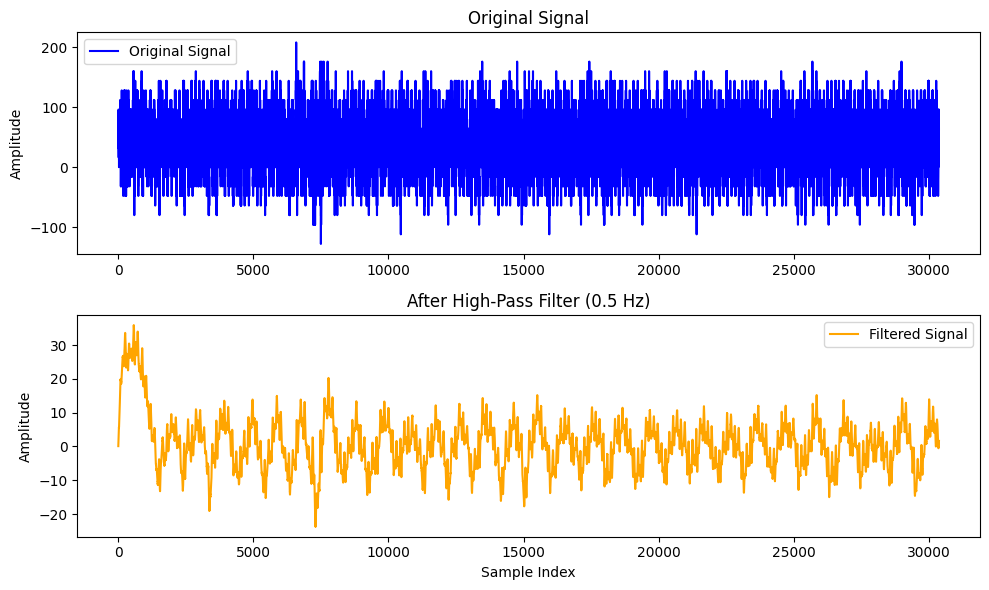

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

# Load the dataset from the CSV file
file_path = r"C:\Users\Amarjith CK\Downloads\modified-matlab-code\Under_Bed_AC.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Assuming your CSV file has columns named 'Timestamp', 'Channel1', 'Channel2', 'Channel3', 'Channel4'
sig = df['Channel1']  # Choose the channel you want to filter
# Apply high-pass filter
cutoff_frequency = 0.5  # Hz
fs = 490  # Sampling rate, adjust based on your dataset
order = 1
sos = signal.butter(order, [0.1,0.5], 'bandpass', fs=fs, output='sos',analog=False,)
filtered = signal.sosfilt(sos, sig)


# Plot original signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sig, label='Original Signal', color='blue')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.legend()

# Plot filtered signal
plt.subplot(2, 1, 2)
plt.plot(filtered, label='Filtered Signal', color='orange')
plt.title('After High-Pass Filter ({} Hz)'.format(cutoff_frequency))
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Apply high-pass filter
cutoff_frequency = 15  # Hz
fs = 490  # Sampling rate, adjust based on your dataset
order = 10
sos = signal.butter(order, cutoff_frequency, 'hp', fs=fs, output='sos')
filtered = signal.sosfilt(sos, sig)

# Sub-sample for visualization
subsample_factor = 10
sig_subsampled = sig[::subsample_factor]
filtered_subsampled = filtered[::subsample_factor]

# Plot original and filtered signals
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(sig_subsampled, label='Original Signal')
ax1.set_title('Original Signal (Sub-sampled)')
ax1.set_ylabel('Amplitude')
ax1.legend()

ax2.plot(filtered_subsampled, label='Filtered Signal')
ax2.set_title('After High-Pass Filter ({} Hz) (Sub-sampled)'.format(cutoff_frequency))
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Amplitude')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
bdf['buttered_channel1'] = [butter_bandpass_filter(data, lowcut, highcut, fs, order=1) for data in df['Channel1'] ]